In [42]:
import pandas as pd
import numpy as np


In [58]:
data_set = pd.read_csv('/content/Copy of PHISHING_DATASET.csv')

In [59]:
data_set


,URL_IDENTIFICATION,URL_LENGTH,CHARACTER_SET,SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,COUNTRY,STATE,REGISTRATION_DATE,UPDATED_DATE,...,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
0,A0_71,21,ISO-8859-1,7,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,United Kingdom,NaN,16 July 2000,04 July 2015,...,0,1,717,10,11,1011,1960,11,4.0,1
1,A0_97,21,iso-8859-1,7,nginx,686.0,Russia,Novosibirskaya obl.,25 May 2013,23 May 2016,...,0,2,603,9,8,745,1580,8,2.0,1
2,M0_2303,21,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,NaN,NaN,09 August 1999,10 February 2015,...,7,3,618,9,7,618,562,7,0.0,0
3,M0_584,21,utf-8,6,nginx,15025.0,NaN,NaN,NaN,NaN,...,1,5,1099,17,15,1243,15476,15,2.0,0
4,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,02 November 2003,29 June 2015,...,6,6,696,10,8,696,636,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781,M0_584,21,utf-8,6,nginx,15025.0,NaN,NaN,NaN,NaN,...,1,5,1099,17,15,1243,15476,15,2.0,0
1782,A0_69,22,us-ascii,7,Microsoft-HTTPAPI/2.0,324.0,America,CO,15 September 2013,25 February 2017,...,0,4,850,9,11,994,1354,11,2.0,1
1783,M0_161,22,utf-8,6,openresty/1.11.2.1,NaN,America,CA,03 July 1999,07 August 2015,...,29,6,3833,42,43,4125,22495,43,4.0,0
1784,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,02 November 2003,29 June 2015,...,6,6,696,10,8,696,636,8,0.0,0


In [60]:
data_set.shape

(1786, 21)

In [61]:
data_set.columns


Index(['URL_IDENTIFICATION', 'URL_LENGTH', 'CHARACTER_SET',
       'SPECIAL_CHARACTERS', 'SERVER', 'CONTENT_LENGTH', 'COUNTRY', 'STATE',
       'REGISTRATION_DATE', 'UPDATED_DATE', 'TCP_PACKETS_EXCHANGE',
       'PORTS_DETECTED', 'REMOTE_IP', 'BYTES_TRANSFERRED',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES',
       'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS', 'WEBSITE_TYPE'],
      dtype='object')

In [62]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   URL_IDENTIFICATION    1786 non-null   object 
 1   URL_LENGTH            1786 non-null   int64  
 2   CHARACTER_SET         1779 non-null   object 
 3   SPECIAL_CHARACTERS    1786 non-null   int64  
 4   SERVER                1610 non-null   object 
 5   CONTENT_LENGTH        973 non-null    float64
 6   COUNTRY               1478 non-null   object 
 7   STATE                 1421 non-null   object 
 8   REGISTRATION_DATE     1658 non-null   object 
 9   UPDATED_DATE          1646 non-null   object 
 10  TCP_PACKETS_EXCHANGE  1786 non-null   int64  
 11  PORTS_DETECTED        1786 non-null   int64  
 12  REMOTE_IP             1786 non-null   int64  
 13  BYTES_TRANSFERRED     1786 non-null   int64  
 14  REMOTE_APP_PACKETS    1786 non-null   int64  
 15  SOURCE_APP_PACKETS   

In [63]:
data_set.describe()

,URL_LENGTH,SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_PACKETS_EXCHANGE,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
count,1786.000000,1786.000000,973.000000,1786.000000,1786.000000,1786.000000,1.786000e+03,1786.000000,1786.000000,1.786000e+03,1.786000e+03,1786.000000,1785.000000,1786.000000
mean,56.862822,11.097984,11695.050360,16.256439,5.479283,3.064950,2.977852e+03,18.740761,18.533595,3.150951e+03,1.587064e+04,18.533595,2.261625,0.121501
std,27.579652,4.550978,36322.550809,40.449744,21.784606,3.384134,5.597212e+04,46.338246,41.575502,5.597533e+04,6.976694e+04,41.575502,2.928025,0.326800
min,16.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,39.000000,8.000000,324.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
50%,49.000000,10.000000,1853.000000,7.000000,0.000000,2.000000,6.820000e+02,9.000000,8.000000,7.365000e+02,5.940000e+02,8.000000,0.000000,0.000000
75%,68.000000,12.750000,11323.000000,22.000000,5.000000,5.000000,2.327500e+03,25.000000,26.000000,2.698500e+03,9.809750e+03,26.000000,4.000000,0.000000
max,249.000000,43.000000,649263.000000,1194.000000,708.000000,17.000000,2.362906e+06,1284.000000,1198.000000,2.362906e+06,2.060012e+06,1198.000000,20.000000,1.000000


In [64]:
for col in data_set.columns:
    val=np.mean(data_set[col].isnull())
    print('{} -{}% nulls'.format(col,round(val*100)))

URL_IDENTIFICATION -0% nulls
URL_LENGTH -0% nulls
CHARACTER_SET -0% nulls
SPECIAL_CHARACTERS -0% nulls
SERVER -10% nulls
CONTENT_LENGTH -46% nulls
COUNTRY -17% nulls
STATE -20% nulls
REGISTRATION_DATE -7% nulls
UPDATED_DATE -8% nulls
TCP_PACKETS_EXCHANGE -0% nulls
PORTS_DETECTED -0% nulls
REMOTE_IP -0% nulls
BYTES_TRANSFERRED -0% nulls
REMOTE_APP_PACKETS -0% nulls
SOURCE_APP_PACKETS -0% nulls
REMOTE_APP_BYTES -0% nulls
SOURCE_APP_BYTES -0% nulls
IP_PACKETS -0% nulls
DNS_PACKETS -0% nulls
WEBSITE_TYPE -0% nulls


In [65]:
data_set.isnull().sum()

URL_IDENTIFICATION        0
URL_LENGTH                0
CHARACTER_SET             7
SPECIAL_CHARACTERS        0
SERVER                  176
CONTENT_LENGTH          813
COUNTRY                 308
STATE                   365
REGISTRATION_DATE       128
UPDATED_DATE            140
TCP_PACKETS_EXCHANGE      0
PORTS_DETECTED            0
REMOTE_IP                 0
BYTES_TRANSFERRED         0
REMOTE_APP_PACKETS        0
SOURCE_APP_PACKETS        0
REMOTE_APP_BYTES          0
SOURCE_APP_BYTES          0
IP_PACKETS                0
DNS_PACKETS               1
WEBSITE_TYPE              0
dtype: int64

In [66]:
data_set=data_set.fillna(0)

In [67]:
data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1781     True
1782     True
1783     True
1784     True
1785     True
Length: 1786, dtype: bool

In [68]:
data_set.drop_duplicates()

,URL_IDENTIFICATION,URL_LENGTH,CHARACTER_SET,SPECIAL_CHARACTERS,SERVER,CONTENT_LENGTH,COUNTRY,STATE,REGISTRATION_DATE,UPDATED_DATE,...,PORTS_DETECTED,REMOTE_IP,BYTES_TRANSFERRED,REMOTE_APP_PACKETS,SOURCE_APP_PACKETS,REMOTE_APP_BYTES,SOURCE_APP_BYTES,IP_PACKETS,DNS_PACKETS,WEBSITE_TYPE
0,A0_71,21,ISO-8859-1,7,Apache/2.4.23 (Unix) OpenSSL/1.0.1e-fips mod_b...,957.0,United Kingdom,0,16 July 2000,04 July 2015,...,0,1,717,10,11,1011,1960,11,4.0,1
1,A0_97,21,iso-8859-1,7,nginx,686.0,Russia,Novosibirskaya obl.,25 May 2013,23 May 2016,...,0,2,603,9,8,745,1580,8,2.0,1
2,M0_2303,21,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,0,0,09 August 1999,10 February 2015,...,7,3,618,9,7,618,562,7,0.0,0
3,M0_584,21,utf-8,6,nginx,15025.0,0,0,0,0,...,1,5,1099,17,15,1243,15476,15,2.0,0
4,M0_2122,22,iso-8859-1,6,nginx,318.0,America,Tennessee,02 November 2003,29 June 2015,...,6,6,696,10,8,696,636,8,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,M3_75,20,utf-8,5,nginx/1.10.1,0.0,0,0,08 November 2014,0,...,0,0,0,1,2,146,62,2,2.0,1
1777,M0_1013,20,utf-8,6,Apache,0.0,America,Kansas,14 September 2007,09 September 2015,...,0,0,0,0,0,0,0,0,0.0,0
1778,M0_1102,20,us-ascii,6,Microsoft-HTTPAPI/2.0,324.0,America,CO,22 November 2016,23 November 2016,...,0,0,0,0,0,0,0,0,0.0,0
1779,M0_22,20,utf-8,7,0,13716.0,GB,0,11 October 2002,06 October 2016,...,6,8,1492,20,20,1784,2334,20,4.0,0


In [69]:
data_set["REGISTRATION_DATE"] = pd.to_datetime(data_set["REGISTRATION_DATE"], format="%d %B %Y", errors="coerce")
data_set["UPDATED_DATE"] = pd.to_datetime(data_set["UPDATED_DATE"], format="%d %B %Y", errors="coerce")

In [70]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1786 entries, 0 to 1785
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   URL_IDENTIFICATION    1786 non-null   object        
 1   URL_LENGTH            1786 non-null   int64         
 2   CHARACTER_SET         1786 non-null   object        
 3   SPECIAL_CHARACTERS    1786 non-null   int64         
 4   SERVER                1786 non-null   object        
 5   CONTENT_LENGTH        1786 non-null   float64       
 6   COUNTRY               1786 non-null   object        
 7   STATE                 1786 non-null   object        
 8   REGISTRATION_DATE     1650 non-null   datetime64[ns]
 9   UPDATED_DATE          1641 non-null   datetime64[ns]
 10  TCP_PACKETS_EXCHANGE  1786 non-null   int64         
 11  PORTS_DETECTED        1786 non-null   int64         
 12  REMOTE_IP             1786 non-null   int64         
 13  BYTES_TRANSFERRED 

segragating categorical and continuos columns

In [74]:
cat_col=[i for i in data_set.columns if data_set[i].dtype=="O"]

cont_col=[i for i in data_set.columns if data_set[i].dtype!="O" and data_set[i].dtype!='datetime64[ns]'] 

print(cat_col)
print(cont_col)

['URL_IDENTIFICATION', 'CHARACTER_SET', 'SERVER', 'COUNTRY', 'STATE']
['URL_LENGTH', 'SPECIAL_CHARACTERS', 'CONTENT_LENGTH', 'TCP_PACKETS_EXCHANGE', 'PORTS_DETECTED', 'REMOTE_IP', 'BYTES_TRANSFERRED', 'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES', 'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS', 'WEBSITE_TYPE']


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

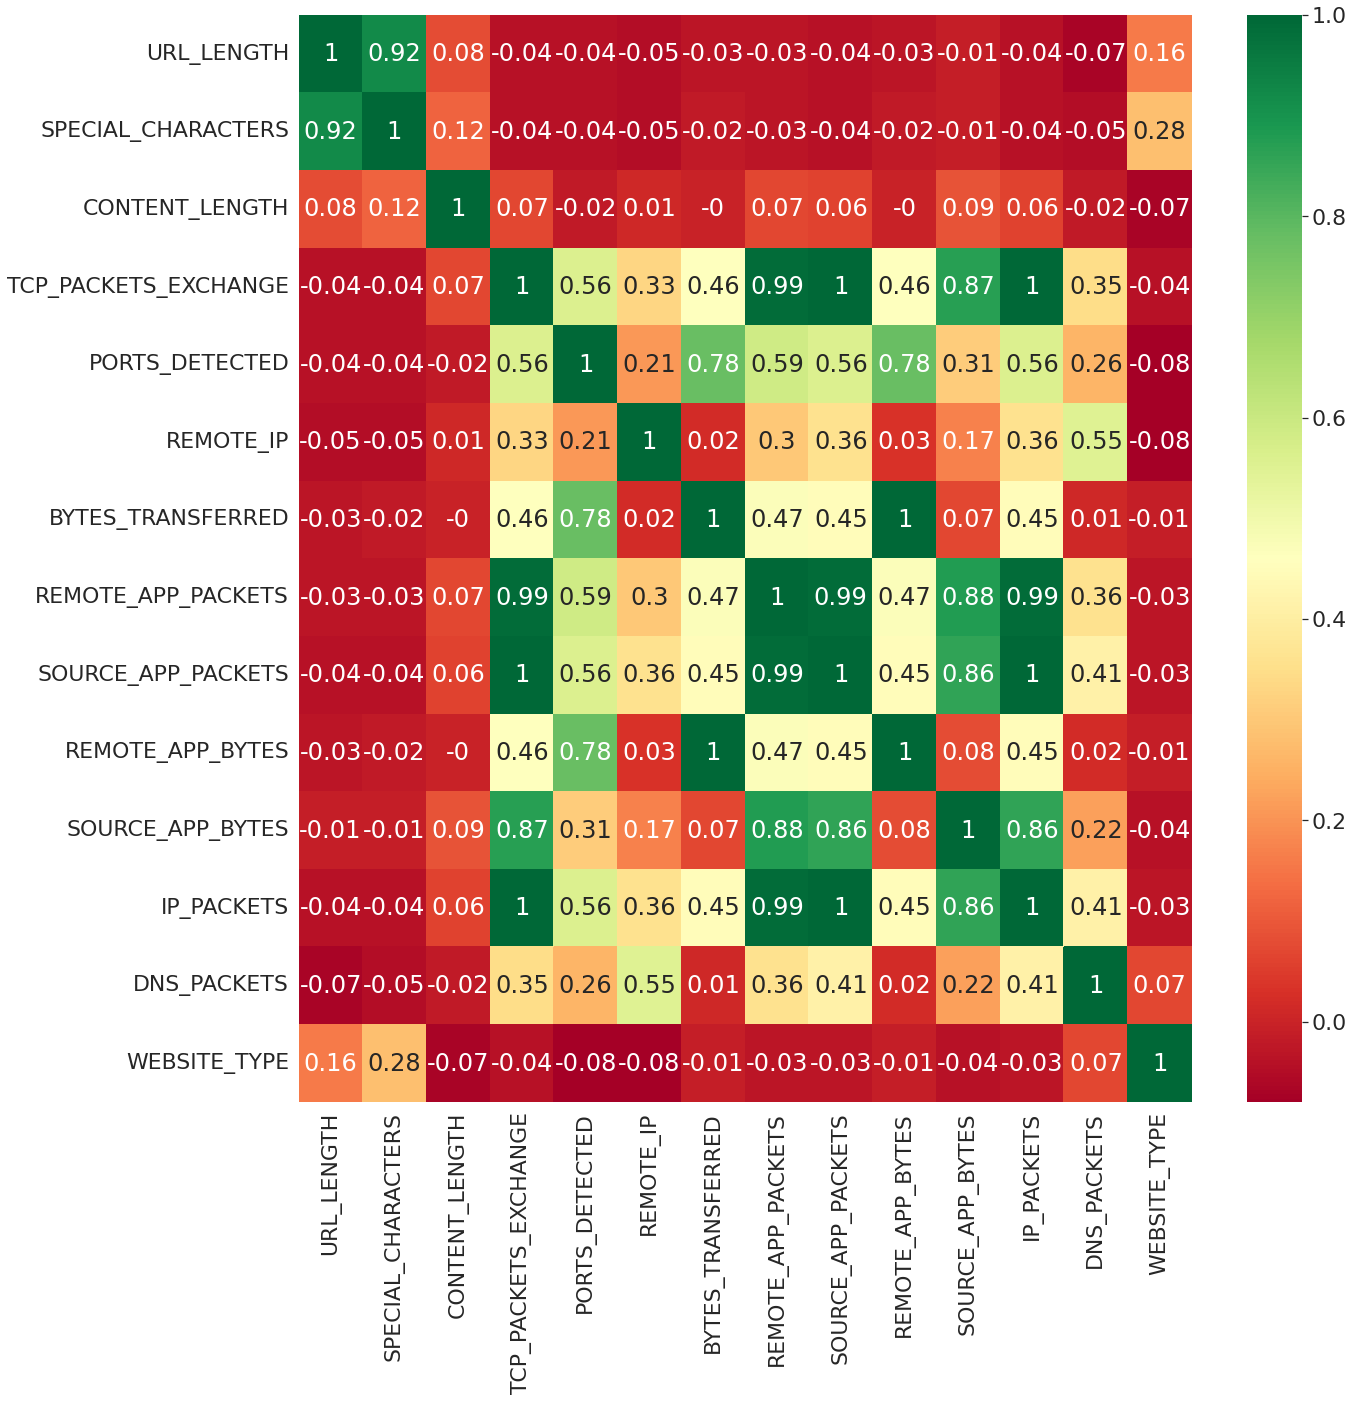

In [75]:
corr = data_set[cont_col].corr()
plt.figure(figsize=(20,20))
sns.set(font_scale=2)
sns.heatmap(data_set[cont_col].corr().round(2), cmap='RdYlGn', annot=True)
plt.show()

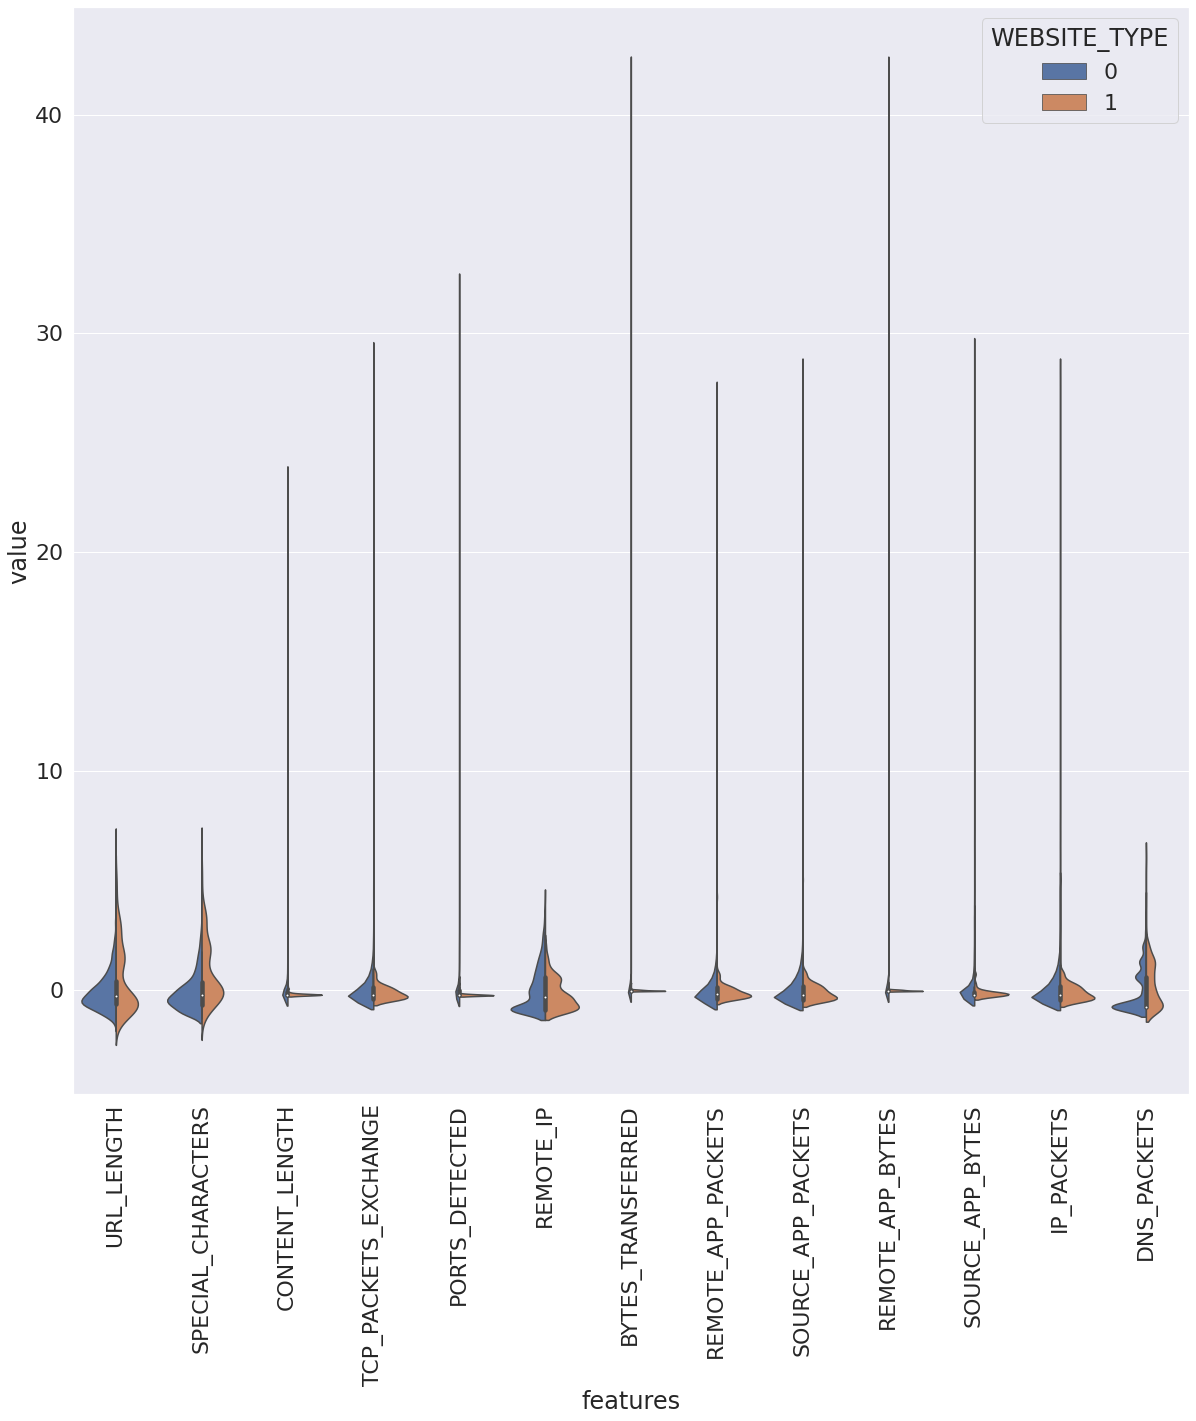

In [76]:
y=data_set['WEBSITE_TYPE']
x=data_set[cont_col]
x = x.drop("WEBSITE_TYPE",axis = 1)
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([y,data_n_2],axis=1)
data = pd.melt(data,id_vars="WEBSITE_TYPE",var_name="features",value_name='value')
plt.figure(figsize=(20,20))
sns.violinplot(x="features", y="value", hue="WEBSITE_TYPE", data=data,split=True, inner="box")
plt.xticks(rotation=90);

No. of Benign: 1569
No. of Malicious: 217


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


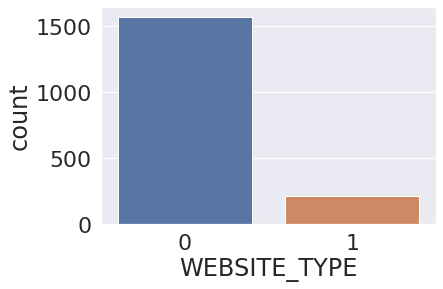

In [55]:
sns.countplot(y)
B,M=y.value_counts()
print("No. of Benign:", B)
print("No. of Malicious:", M)

In [77]:
data_set.columns


Index(['URL_IDENTIFICATION', 'URL_LENGTH', 'CHARACTER_SET',
       'SPECIAL_CHARACTERS', 'SERVER', 'CONTENT_LENGTH', 'COUNTRY', 'STATE',
       'REGISTRATION_DATE', 'UPDATED_DATE', 'TCP_PACKETS_EXCHANGE',
       'PORTS_DETECTED', 'REMOTE_IP', 'BYTES_TRANSFERRED',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES',
       'SOURCE_APP_BYTES', 'IP_PACKETS', 'DNS_PACKETS', 'WEBSITE_TYPE'],
      dtype='object')

In [78]:
data_set.drop(["REMOTE_APP_PACKETS"],inplace = True, axis = 1)


Convert all columns with string values to string format

In [79]:
data_set["URL_IDENTIFICATION"] = data_set["URL_IDENTIFICATION"].astype(str)
data_set["CHARACTER_SET"] = data_set["CHARACTER_SET"].astype(str)
data_set["SERVER"] = data_set["SERVER"].astype(str)
data_set["COUNTRY"] = data_set["COUNTRY"].astype(str)
data_set["STATE"] = data_set["STATE"].astype(str)

In [80]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

Perform label encoding to convert values to numerical format

In [81]:
data_set["URL_IDENTIFICATION"] = encoder.fit_transform(data_set["URL_IDENTIFICATION"])
data_set["CHARACTER_SET"] = encoder.fit_transform(data_set["CHARACTER_SET"])
data_set["SERVER"] = encoder.fit_transform(data_set["SERVER"])
data_set["COUNTRY"] = encoder.fit_transform(data_set["COUNTRY"])
data_set["STATE"] = encoder.fit_transform(data_set["STATE"])

In [82]:
data_set.drop(columns=['REGISTRATION_DATE','UPDATED_DATE'],inplace=True)

In [83]:
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV

In [84]:
X = data_set.drop("WEBSITE_TYPE", axis=1)
y = data_set["WEBSITE_TYPE"]

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=2022)

In [87]:
from collections import Counter
counts = Counter(y)
print("Number of 0s:", counts[0])
print("Number of 1s:", counts[1])

Number of 0s: 1569
Number of 1s: 217


Class are imbalaned


Since the number of 0 and 1 have much more difference we have to use Synthetic Minority Oversampling Technique (SMOTE)

In [88]:
from imblearn.over_sampling import SMOTE
smo = SMOTE(random_state=100)
x_resampled, y_resampled = smo.fit_resample(X_train, y_train)
print(np.unique(y_resampled,return_counts=True))
x_resampled.shape
X_train.shape

(array([0, 1]), array([1081, 1081]))


(1250, 17)

Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score
clf = RandomForestClassifier()


In [94]:
params = {'max_features':[2,3,4],'n_estimators':[10,20,50,90]}
gcv_cl = GridSearchCV(clf, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_cl.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': [2, 3, 4],
                         'n_estimators': [10, 20, 50, 90]},
             scoring='roc_auc')

In [95]:
print(gcv_cl.best_params_)
print(gcv_cl.best_score_)

{'max_features': 2, 'n_estimators': 90}
0.9997133248626678


Evaluate the model on the testing set

In [97]:
best_model_cl=gcv_cl.best_estimator_
y_pred_clf = best_model_cl.predict(X_test)

print(classification_report(y_test, y_pred_clf))
print(roc_auc_score(y_test, y_pred_clf))
print(accuracy_score(y_test, y_pred_clf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       488
           1       1.00      1.00      1.00        48

    accuracy                           1.00       536
   macro avg       1.00      1.00      1.00       536
weighted avg       1.00      1.00      1.00       536

1.0
1.0


KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [99]:
params = {'n_neighbors':[2,3,4]}
gcv_kn = GridSearchCV(knn, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_kn.fit(x_resampled, y_resampled)

print(gcv_kn.best_params_)
print(gcv_kn.best_score_)

{'n_neighbors': 4}
0.9874047148894073


Evaluate the model on the testing set

In [100]:
best_model_kn=gcv_kn.best_estimator_
y_pred_knn = best_model_kn.predict(X_test)

print(classification_report(y_test, y_pred_knn))
print(roc_auc_score(y_test, y_pred_knn))
print(accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       488
           1       0.79      0.85      0.82        48

    accuracy                           0.97       536
   macro avg       0.89      0.92      0.90       536
weighted avg       0.97      0.97      0.97       536

0.9158128415300545
0.9664179104477612


Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=2022)

In [102]:
params = {'max_iter':[100,200,300],
          'solver':['liblinear']}
gcv_lr = GridSearchCV(lr, param_grid=params,scoring='roc_auc',cv=kfold)
gcv_lr.fit(x_resampled, y_resampled)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=LogisticRegression(random_state=2022),
             param_grid={'max_iter': [100, 200, 300], 'solver': ['liblinear']},
             scoring='roc_auc')

In [103]:
print(gcv_lr.best_params_)
print(gcv_lr.best_score_)

{'max_iter': 100, 'solver': 'liblinear'}
0.9371524814625174


Evaluate the model on the testing set

In [104]:
best_model_lr=gcv_lr.best_estimator_
y_pred_lr = best_model_lr.predict(X_test)

print(classification_report(y_test, y_pred_lr))
print(roc_auc_score(y_test, y_pred_lr))
print(accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90       488
           1       0.33      0.83      0.47        48

    accuracy                           0.83       536
   macro avg       0.66      0.83      0.69       536
weighted avg       0.92      0.83      0.86       536

0.8336748633879782
0.8339552238805971
